In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
df.shape

(200000, 202)

## Preprocessing

In [4]:
# 랜덤하게 10000개의 데이터를 뽑았다.
rndperm = np.random.permutation(df.shape[0])
df1=df.loc[rndperm[:10000],:]
df1.shape

(10000, 202)

In [5]:
X = df1.drop(["ID_code","target"], axis=1)
y = df1["target"]

In [6]:
#train / validation / test set 으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [7]:
# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train=ss.fit_transform(X_train)
X_val=ss.fit_transform(X_val)
X_test=ss.transform(X_test)

In [8]:
# PCA로 149차원으로 축소
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.8).fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [9]:
X_train.shape, X_val.shape, X_test.shape

((6400, 149), (1600, 149), (2000, 149))

## SVM

In [10]:
from sklearn.svm import SVC
from sklearn import metrics

In [11]:
#default linear
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_val)
print('Accuracy Score:')
print(metrics.accuracy_score(y_val,y_pred))

Accuracy Score:
0.914375


In [12]:
#default RBF kernel
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_val)
print('Accuracy Score:')
print(metrics.accuracy_score(y_val,y_pred))

Accuracy Score:
0.900625


In [13]:
#default polynomial kernel
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_val)
print('Accuracy Score:')
print(metrics.accuracy_score(y_val,y_pred))

Accuracy Score:
0.899375


## Hypterparameter Tuning

### 1. Hyperparameter C Tuning (Linear Kernel)

In [15]:
# 시간이 너무 오래 걸려 cross validation을 사용하지 않고 validation set을 통해 accuracy를 측정하였습니다.

In [14]:
C_range=list(range(1,16))
acc_score = []
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_val)
    score = metrics.accuracy_score(y_val,y_pred)
    print('C:',c,'Accuracy:',score)
    acc_score.append(score)

C: 1 Accuracy: 0.914375
C: 2 Accuracy: 0.914375
C: 3 Accuracy: 0.914375
C: 4 Accuracy: 0.914375
C: 5 Accuracy: 0.91375
C: 6 Accuracy: 0.914375
C: 7 Accuracy: 0.914375
C: 8 Accuracy: 0.914375
C: 9 Accuracy: 0.914375
C: 10 Accuracy: 0.91375
C: 11 Accuracy: 0.914375
C: 12 Accuracy: 0.914375
C: 13 Accuracy: 0.914375
C: 14 Accuracy: 0.914375
C: 15 Accuracy: 0.914375


In [15]:
print(np.mean(acc_score))

0.9142916666666666


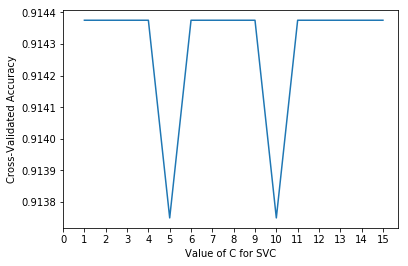

In [16]:
C_values=list(range(1,16))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,16,1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [17]:
# accuracy가 높은 부분을 중점적으로 다시 해보자

In [31]:
C_range=list(np.arange(0.2,5,0.2))
C_range.extend(np.arange(6,9,0.2))
C_range.extend(np.arange(11,15,0.2))

acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_val)
    score = metrics.accuracy_score(y_val,y_pred)
    print('C:',c, 'Accuracy:',score)
    acc_score.append(score)

C: 0.2 Accuracy: 0.913125
C: 0.4 Accuracy: 0.91375
C: 0.6000000000000001 Accuracy: 0.913125
C: 0.8 Accuracy: 0.914375
C: 1.0 Accuracy: 0.914375
C: 1.2 Accuracy: 0.914375
C: 1.4000000000000001 Accuracy: 0.914375
C: 1.6 Accuracy: 0.914375
C: 1.8 Accuracy: 0.914375
C: 2.0 Accuracy: 0.914375
C: 2.2 Accuracy: 0.91375
C: 2.4000000000000004 Accuracy: 0.914375
C: 2.6000000000000005 Accuracy: 0.914375
C: 2.8000000000000003 Accuracy: 0.914375
C: 3.0000000000000004 Accuracy: 0.914375
C: 3.2 Accuracy: 0.914375
C: 3.4000000000000004 Accuracy: 0.914375
C: 3.6000000000000005 Accuracy: 0.914375
C: 3.8000000000000003 Accuracy: 0.914375
C: 4.0 Accuracy: 0.914375
C: 4.2 Accuracy: 0.914375
C: 4.4 Accuracy: 0.914375
C: 4.6000000000000005 Accuracy: 0.914375
C: 4.800000000000001 Accuracy: 0.914375
C: 6.0 Accuracy: 0.914375
C: 6.2 Accuracy: 0.914375
C: 6.4 Accuracy: 0.914375
C: 6.6000000000000005 Accuracy: 0.914375
C: 6.800000000000001 Accuracy: 0.914375
C: 7.000000000000001 Accuracy: 0.914375
C: 7.2000000000

In [ ]:
C_range=list(np.arange(0.2,5,0.2))
C_range.extend(np.arange(6,9,0.2))
C_range.extend(np.arange(11,15,0.2))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,17,0.5))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### 2. Hyperparameter C Tuning (RBF Kernel)

In [24]:
C_range=list(range(1,16))
acc_score = []
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_val)
    score = metrics.accuracy_score(y_val,y_pred)
    print('C:',c,'Accuracy:',score)
    acc_score.append(score)

C: 1 Accuracy: 0.900625
C: 2 Accuracy: 0.9125
C: 3 Accuracy: 0.915
C: 4 Accuracy: 0.915
C: 5 Accuracy: 0.914375
C: 6 Accuracy: 0.914375
C: 7 Accuracy: 0.914375
C: 8 Accuracy: 0.914375
C: 9 Accuracy: 0.914375
C: 10 Accuracy: 0.914375
C: 11 Accuracy: 0.914375
C: 12 Accuracy: 0.914375
C: 13 Accuracy: 0.914375
C: 14 Accuracy: 0.914375
C: 15 Accuracy: 0.914375


In [25]:
print(np.mean(acc_score))

0.9134166666666665


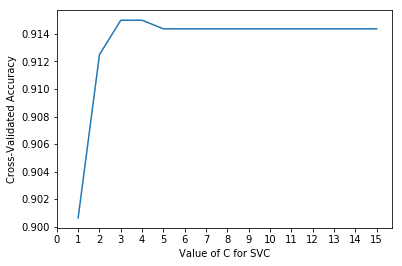

In [26]:
C_values=list(range(1,16))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,16,1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [27]:
C_range=list(np.arange(2,5,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_val)
    score = metrics.accuracy_score(y_val,y_pred)
    print('C:',c, 'Accuracy:',score)
    acc_score.append(score)

C: 2.0 Accuracy: 0.9125
C: 2.1 Accuracy: 0.913125
C: 2.2 Accuracy: 0.914375
C: 2.3000000000000003 Accuracy: 0.914375
C: 2.4000000000000004 Accuracy: 0.914375
C: 2.5000000000000004 Accuracy: 0.914375
C: 2.6000000000000005 Accuracy: 0.914375
C: 2.7000000000000006 Accuracy: 0.914375
C: 2.8000000000000007 Accuracy: 0.914375
C: 2.900000000000001 Accuracy: 0.915
C: 3.000000000000001 Accuracy: 0.915
C: 3.100000000000001 Accuracy: 0.914375
C: 3.200000000000001 Accuracy: 0.915
C: 3.300000000000001 Accuracy: 0.915
C: 3.4000000000000012 Accuracy: 0.915
C: 3.5000000000000013 Accuracy: 0.914375
C: 3.6000000000000014 Accuracy: 0.914375
C: 3.7000000000000015 Accuracy: 0.914375
C: 3.8000000000000016 Accuracy: 0.914375
C: 3.9000000000000017 Accuracy: 0.914375
C: 4.000000000000002 Accuracy: 0.915
C: 4.100000000000001 Accuracy: 0.915
C: 4.200000000000002 Accuracy: 0.915
C: 4.3000000000000025 Accuracy: 0.915
C: 4.400000000000002 Accuracy: 0.915
C: 4.500000000000002 Accuracy: 0.914375
C: 4.600000000000002 

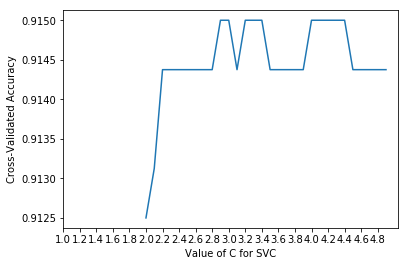

In [30]:
C_values=list(np.arange(2,5,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(1,5,0.2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### 3. Hyperparameter Gamma Tuning (RBF Kernel)

In [18]:
#RBF kernel의 하이퍼파라미터 C, gamma중 gamma만 해보자
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_val)
    score = metrics.accuracy_score(y_val,y_pred)
    print('Gamma:',g, 'Accuracy:',score)
    acc_score.append(score)

Gamma: 0.0001 Accuracy: 0.899375
Gamma: 0.001 Accuracy: 0.899375
Gamma: 0.01 Accuracy: 0.9
Gamma: 0.1 Accuracy: 0.899375
Gamma: 1 Accuracy: 0.899375
Gamma: 10 Accuracy: 0.899375
Gamma: 100 Accuracy: 0.899375


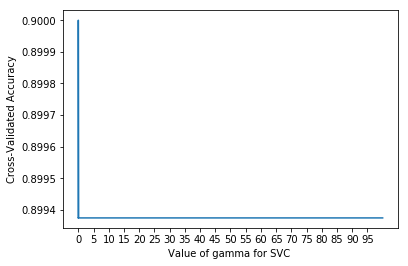

In [19]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [20]:
#accuracy가 가장 높은 gamma는 0.01
gamma_range[np.argmax(acc_score)]

0.01

In [21]:
#gammma 0.01을 주위로 더 자세하게 해보자
gamma_range=[0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_val)
    score = metrics.accuracy_score(y_val,y_pred)
    print('Gamma:',g, 'Accuracy:',score)
    acc_score.append(score)

Gamma: 0.005 Accuracy: 0.900625
Gamma: 0.01 Accuracy: 0.9
Gamma: 0.015 Accuracy: 0.899375
Gamma: 0.02 Accuracy: 0.899375
Gamma: 0.025 Accuracy: 0.899375
Gamma: 0.03 Accuracy: 0.899375
Gamma: 0.035 Accuracy: 0.899375
Gamma: 0.04 Accuracy: 0.899375
Gamma: 0.045 Accuracy: 0.899375
Gamma: 0.05 Accuracy: 0.899375


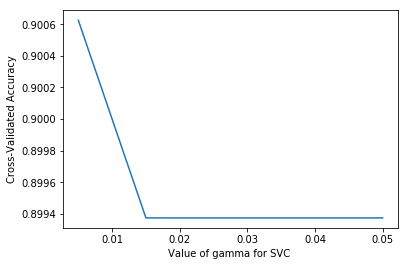

In [22]:
gamma_range=[0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [23]:
# 0.005부근에 accuracy가 높다.

## 3. Grid Search

In [33]:
from sklearn.svm import SVC
svm_model= SVC()

In [34]:
C_range=list(np.arange(0.8,5,0.2))
C_range.extend(np.arange(6,9,0.2))
C_range.extend(np.arange(11,15,0.2))

C_range2=list(np.arange(2.9,3.5,0.1))
C_range2.extend(np.arange(4,4.5,0.1))

tuned_parameters = {
 'C': C_range , 'kernel': ['linear'],
 'C': C_range2 , 'gamma': (np.arange(0.001,0.015,0.001)), 'kernel': ['rbf']
                   }

In [35]:
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters, cv=3, scoring='accuracy')

In [36]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.90640625


In [37]:
print(model_svm.best_params_)

{'C': 4.0, 'gamma': 0.003, 'kernel': 'rbf'}


## Final Model

In [38]:
from sklearn.svm import SVC
svc= SVC(C=4, gamma=0.003, kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.897
